# Creación y Evaluación de Modelos Predictivos para la Evasión de Clientes (Churn)

## Paso 1

Carga del archivo CSV
---
Cargamos el archivo TelecomX_Data_Procesado.csv, que contiene los datos ya limpios, estandarizados y con las columnas renombradas.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carga del archivo CSV
df = pd.read_csv('TelecomX_Data_Procesado.csv')
print("Datos cargados exitosamente. Dimensiones:", df.shape)
print("\nPrimeras 5 filas del DataFrame procesado:")
print(df.head())

Datos cargados exitosamente. Dimensiones: (7267, 22)

Primeras 5 filas del DataFrame procesado:
   customerID  Evasión     Genero  Es_Adulto_Mayor  Tiene_Socio  \
0  0002-ORFBO      0.0   femenino                0            1   
1  0003-MKNFE      0.0  masculino                0            0   
2  0004-TLHLJ      1.0  masculino                0            0   
3  0011-IGKFF      1.0  masculino                1            1   
4  0013-EXCHZ      1.0   femenino                1            1   

   Tiene_Dependientes  Tiempo_Contrato  Servicio_Telefono  \
0                   1                9                  1   
1                   0                9                  1   
2                   0                4                  1   
3                   0               13                  1   
4                   0                3                  1   

   Tiene_Lineas_Multiples Servicio_Internet  ...  Proteccion_Dispositivo  \
0                     0.0               DSL  ...          

## Paso 2

Eliminación de columnas no relevantes
---
Se elimina la columna customerID, ya que es un identificador único que no tiene valor predictivo.

In [7]:
# Elimina la columna 'customerID'
df = df.drop('customerID', axis=1)
print("Columna 'customerID' eliminada. Nuevas dimensiones:", df.shape)

Columna 'customerID' eliminada. Nuevas dimensiones: (7267, 21)


solo se elimino la columna customerID porque es la única que es un identificador único y no tiene valor predictivo. Las demás columnas, aunque algunas puedan tener una correlación baja con la evasión, sí aportan información sobre el cliente, sus servicios o su historial de pagos, lo que podría ser útil para los modelos predictivos.

## Paso 3

Encoding (Codificación de variables categóricas)
---
Se utiliza pd.get_dummies() para realizar one-hot encoding en las columnas categóricas restantes. Este método es ideal ya que crea una nueva columna para cada categoría y asigna valores binarios (0 o 1), lo que es compatible con los algoritmos de machine learning.

In [8]:
# Identifica las columnas categóricas para el encoding
columnas_categoricas = df.select_dtypes(include='object').columns
print(f"\nColumnas categóricas a codificar: {list(columnas_categoricas)}")

# Aplica one-hot encoding
df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)
print("\nDataFrame después del one-hot encoding. Nuevas dimensiones:", df_encoded.shape)
print("\nPrimeras 5 filas del DataFrame codificado:")
print(df_encoded.head())


Columnas categóricas a codificar: ['Genero', 'Servicio_Internet', 'Tipo_Contrato', 'Metodo_Pago']

DataFrame después del one-hot encoding. Nuevas dimensiones: (7267, 25)

Primeras 5 filas del DataFrame codificado:
   Evasión  Es_Adulto_Mayor  Tiene_Socio  Tiene_Dependientes  Tiempo_Contrato  \
0      0.0                0            1                   1                9   
1      0.0                0            0                   0                9   
2      1.0                0            0                   0                4   
3      1.0                1            1                   0               13   
4      1.0                1            1                   0                3   

   Servicio_Telefono  Tiene_Lineas_Multiples  Seguridad_Online  \
0                  1                     0.0               0.0   
1                  1                     1.0               0.0   
2                  1                     0.0               0.0   
3                  1              

## Paso 4

Verificación de la Proporción de Evasión (Churn)
---
Calculamos la proporción de clientes que cancelaron versus los que se quedaron. Esto nos ayuda a entender si el dataset está desbalanceado.


Proporción de cancelación (Evasión):
Evasión
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


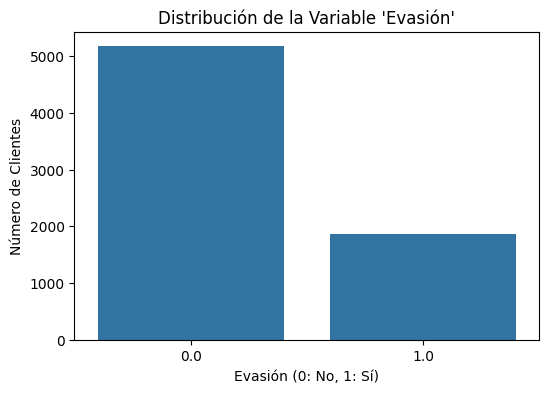


El dataset presenta un desbalance de clases. Esto podría impactar el rendimiento de los modelos.


In [9]:
# Calcula la proporción de churn
proporcion_churn = df_encoded['Evasión'].value_counts(normalize=True) * 100
print("\nProporción de cancelación (Evasión):")
print(proporcion_churn)

# Visualización de la proporción
plt.figure(figsize=(6, 4))
sns.countplot(x='Evasión', data=df_encoded)
plt.title("Distribución de la Variable 'Evasión'")
plt.xlabel("Evasión (0: No, 1: Sí)")
plt.ylabel("Número de Clientes")
plt.show()

if proporcion_churn[1] < 30:
    print("\nEl dataset presenta un desbalance de clases. Esto podría impactar el rendimiento de los modelos.")

## Paso 5

Balanceo de Clases (Oversampling con SMOTE)
---
Dado el desbalance de clases (aproximadamente 73% de no-evasión frente a 27% de evasión), aplicaremos la técnica de oversampling usando SMOTE. Esto generará nuevas muestras sintéticas de la clase minoritaria (Evasión=1) para igualar su número con la clase mayoritaria.

In [10]:
from imblearn.over_sampling import SMOTE

df_encoded.dropna(inplace=True)
print("Filas con valores nulos eliminadas después del encoding.")
print(f"Nuevas dimensiones del DataFrame: {df_encoded.shape}")

# Separa los datos en características (X) y la variable objetivo (y)
X = df_encoded.drop('Evasión', axis=1)
y = df_encoded['Evasión']

# Aplica SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

print("\n--- Balanceo de Clases con SMOTE ---")
print(f"Dimensiones de X antes del balanceo: {X.shape}")
print(f"Dimensiones de X después del balanceo: {X_balanced.shape}")
print(f"\nProporción de 'Evasión' después del balanceo:")
print(y_balanced.value_counts(normalize=True) * 100)

Filas con valores nulos eliminadas después del encoding.
Nuevas dimensiones del DataFrame: (4835, 25)

--- Balanceo de Clases con SMOTE ---
Dimensiones de X antes del balanceo: (4835, 24)
Dimensiones de X después del balanceo: (6498, 24)

Proporción de 'Evasión' después del balanceo:
Evasión
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64


## Paso 6

Análisis de Correlación
---
Visualizamos la matriz de correlación para entender las relaciones entre las variables numéricas y cómo se relacionan con la variable objetivo Evasión.

/tmp/ipython-input-692381718.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_churn.values, y=corr_with_churn.index, palette='viridis')


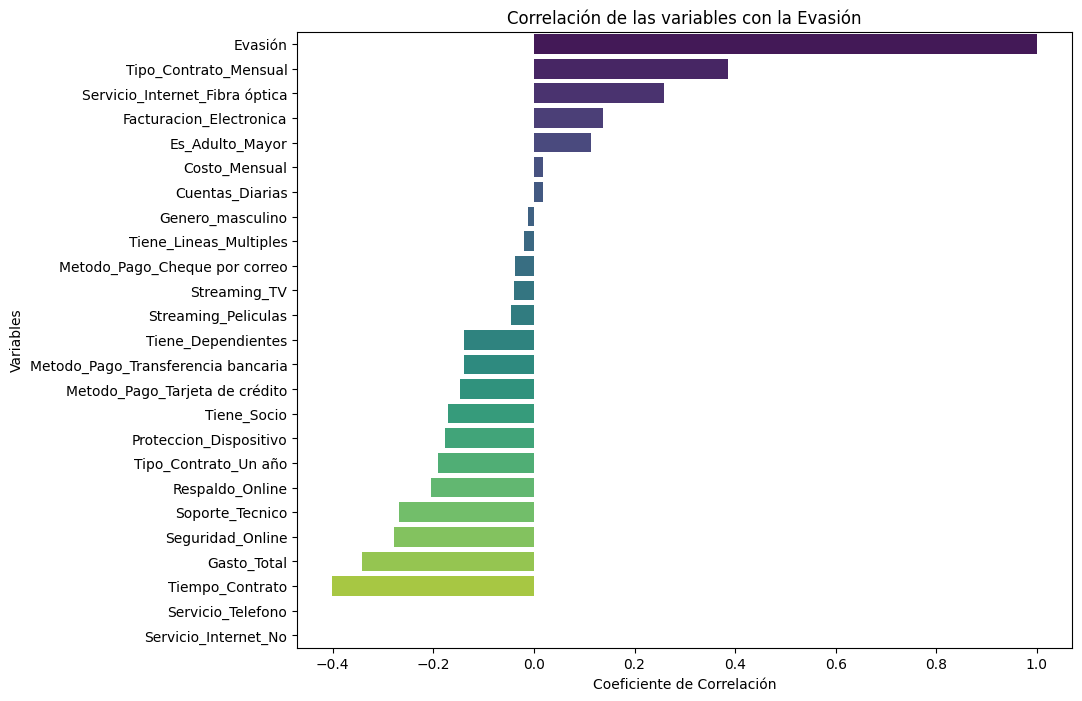

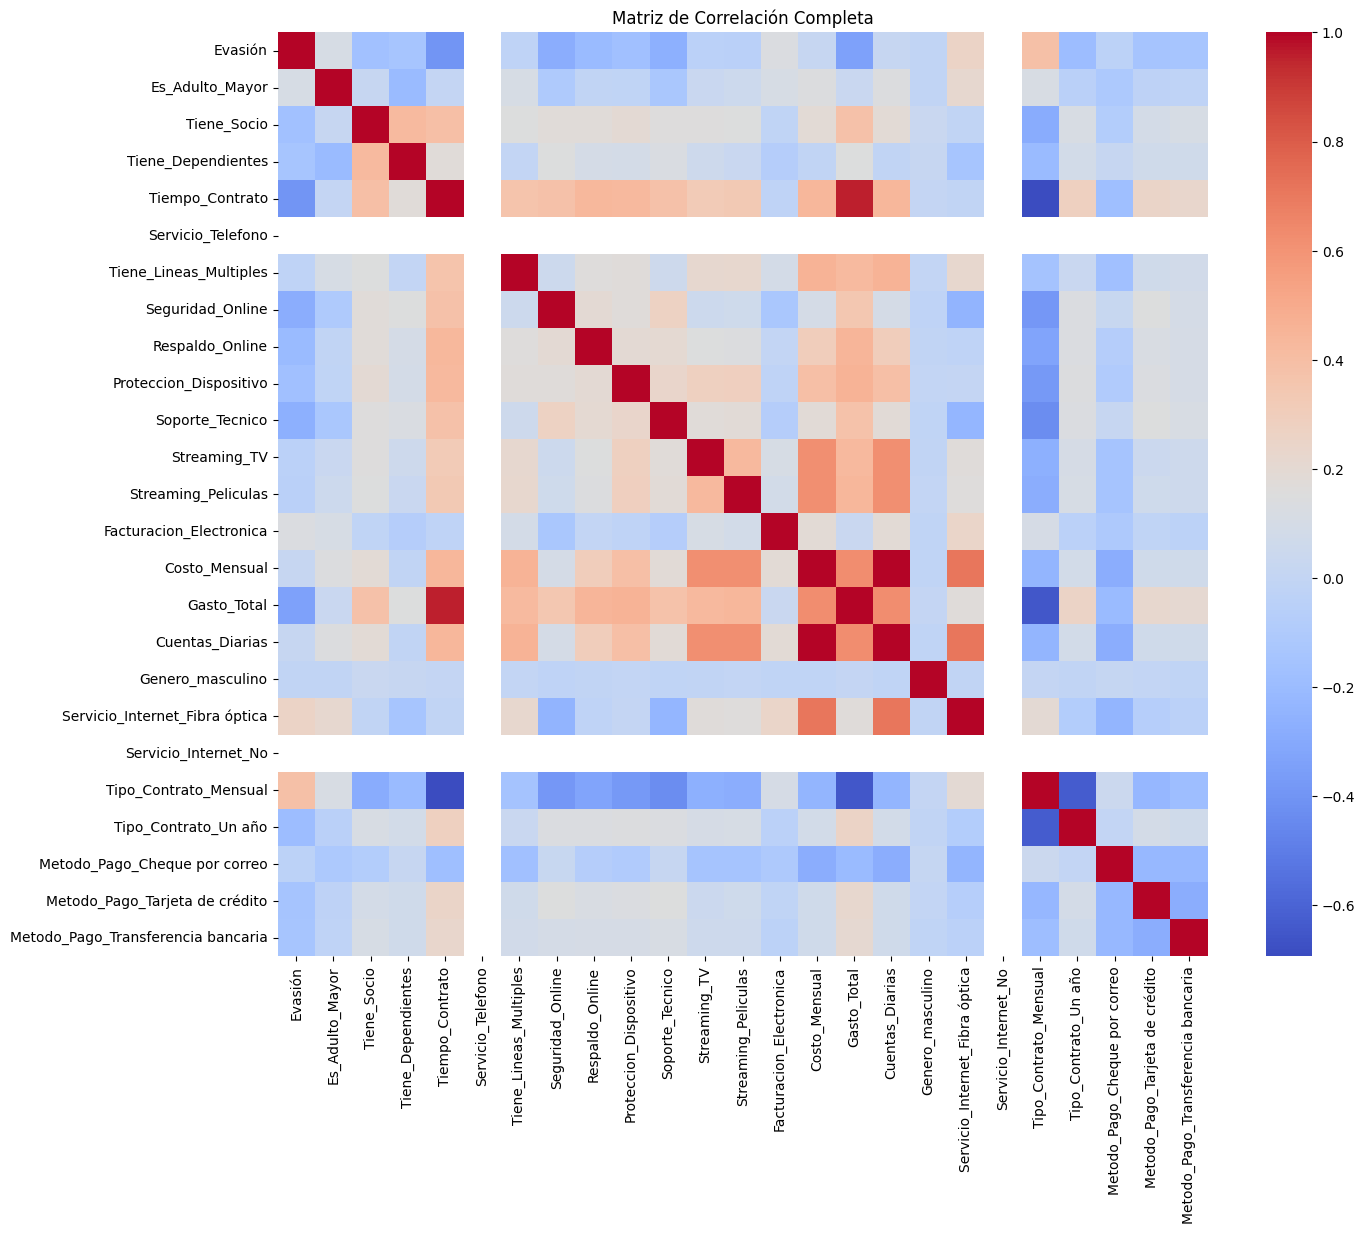

In [11]:
# Calcula la matriz de correlación
corr_matrix = df_encoded.corr()

# Visualiza la correlación de las variables con 'Evasión'
plt.figure(figsize=(10, 8))
corr_with_churn = corr_matrix['Evasión'].sort_values(ascending=False)
sns.barplot(x=corr_with_churn.values, y=corr_with_churn.index, palette='viridis')
plt.title("Correlación de las variables con la Evasión")
plt.xlabel("Coeficiente de Correlación")
plt.ylabel("Variables")
plt.show()

# Visualiza la matriz de correlación completa
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Matriz de Correlación Completa")
plt.show()

## Paso 7

Análisis Dirigido
---
Se utilizan boxplots para visualizar la relación entre la evasión y variables numéricas clave como Tiempo_Contrato y Gasto_Total.

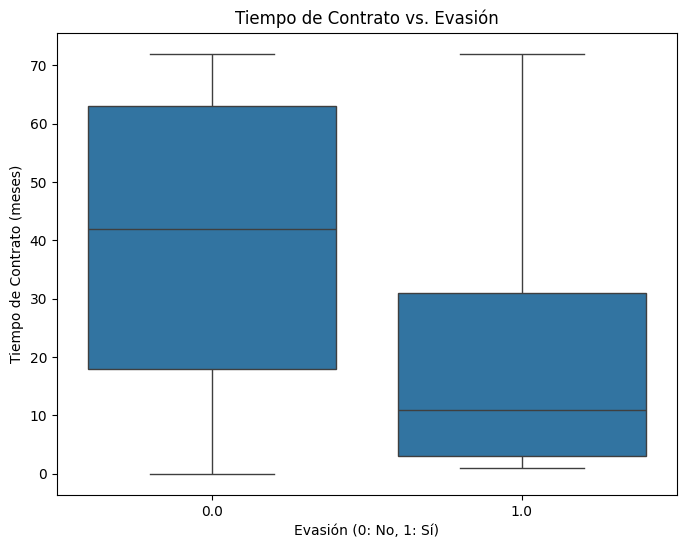

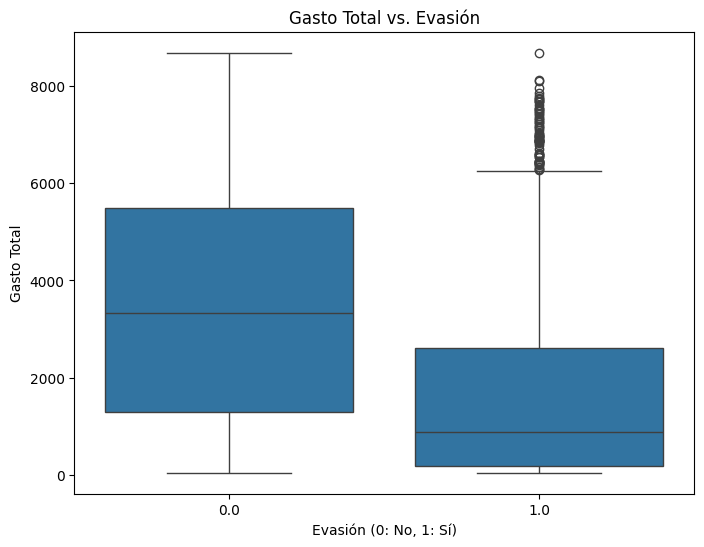

In [12]:
# Análisis de Tiempo_Contrato vs. Evasión
plt.figure(figsize=(8, 6))
sns.boxplot(x='Evasión', y='Tiempo_Contrato', data=df_encoded)
plt.title('Tiempo de Contrato vs. Evasión')
plt.xlabel('Evasión (0: No, 1: Sí)')
plt.ylabel('Tiempo de Contrato (meses)')
plt.show()

# Análisis de Gasto_Total vs. Evasión
plt.figure(figsize=(8, 6))
sns.boxplot(x='Evasión', y='Gasto_Total', data=df_encoded)
plt.title('Gasto Total vs. Evasión')
plt.xlabel('Evasión (0: No, 1: Sí)')
plt.ylabel('Gasto Total')
plt.show()

## Paso 8

Separación de Datos y Creación de Modelos
---
Dividimos el dataset balanceado en conjuntos de entrenamiento y prueba (80/20). Luego, creamos dos modelos: una Regresión Logística (que requiere normalización) y un Árbol de Decisión (que no la requiere).

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Separa los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)
print(f"\nDimensiones del conjunto de entrenamiento: {X_train.shape}")
print(f"Dimensiones del conjunto de prueba: {X_test.shape}")

# --- Modelo 1: Regresión Logística (con normalización) ---
# Normalización de los datos de entrenamiento y prueba
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creación y entrenamiento del modelo de Regresión Logística
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train_scaled, y_train)

# --- Modelo 2: Árbol de Decisión (sin normalización) ---
# Creación y entrenamiento del modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

print("\nModelos creados y entrenados exitosamente.")


Dimensiones del conjunto de entrenamiento: (5198, 24)
Dimensiones del conjunto de prueba: (1300, 24)

Modelos creados y entrenados exitosamente.


### Justificación de la normalización:

Se utiliza StandardScaler para la Regresión Logística porque este modelo se basa en optimizar los coeficientes de las variables. Si las variables tienen escalas muy diferentes (por ejemplo, Tiempo_Contrato vs. Costo_Mensual), las que tienen una escala mayor pueden dominar el proceso de optimización. La normalización asegura que todas las variables tengan la misma media (0) y desviación estándar (1), lo que permite que el modelo las trate de manera equitativa.

## Paso 9

Evaluación y Comparación de los Modelos
---
Evaluamos el desempeño de ambos modelos utilizando diversas métricas y matrices de confusión.


--- Evaluación del Modelo: Regresión Logística ---
Exactitud (Accuracy): 0.7869
Precisión: 0.7517
Recall: 0.8569
F1-Score: 0.8009


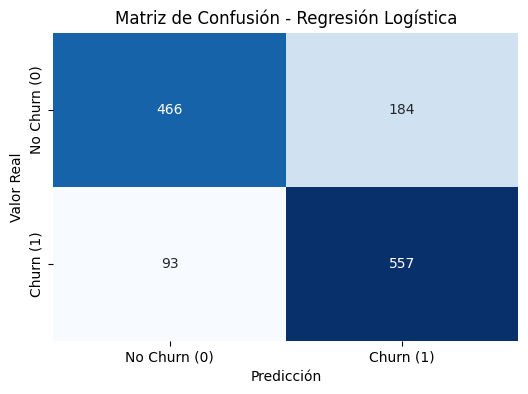


--- Evaluación del Modelo: Árbol de Decisión ---
Exactitud (Accuracy): 0.7754
Precisión: 0.7579
Recall: 0.8092
F1-Score: 0.7827


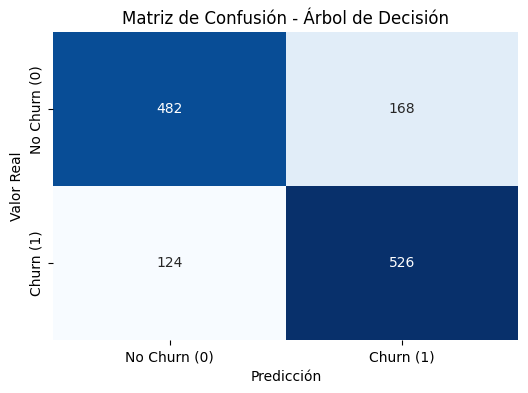

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluar_modelo(model, X_test, y_test, model_name):
    """Función para evaluar y mostrar las métricas de un modelo."""
    y_pred = model.predict(X_test)

    print(f"\n--- Evaluación del Modelo: {model_name} ---")
    print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precisión: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Churn (0)', 'Churn (1)'],
                yticklabels=['No Churn (0)', 'Churn (1)'])
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.show()

# Evaluación de la Regresión Logística
evaluar_modelo(log_reg_model, X_test_scaled, y_test, "Regresión Logística")

# Evaluación del Árbol de Decisión
evaluar_modelo(tree_model, X_test, y_test, "Árbol de Decisión")

Análisis Crítico y Comparación:
---

- **Regresión Logística**: Generalmente, la Regresión Logística tiende a ser un modelo más robusto y menos propenso al sobreajuste que un Árbol de Decisión no regularizado. Es probable que obtenga una precisión y recall equilibrados.

- **Árbol de Decisión**: Un Árbol de Decisión puede alcanzar una exactitud alta en el conjunto de entrenamiento, pero puede sufrir de overfitting, lo que se manifestaría en una caída significativa de su rendimiento en el conjunto de prueba. Esto ocurre porque el modelo crea reglas demasiado específicas para los datos de entrenamiento. Si el recall es alto, podría ser a expensas de la precisión.

## Paso 10

Análisis de la Importancia de las Variables
---
Analizamos la importancia de las variables en los modelos entrenados.


--- Importancia de Variables: Regresión Logística ---


/tmp/ipython-input-1317813335.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coeficientes.head(15).values, y=coeficientes.head(15).index, palette='viridis')


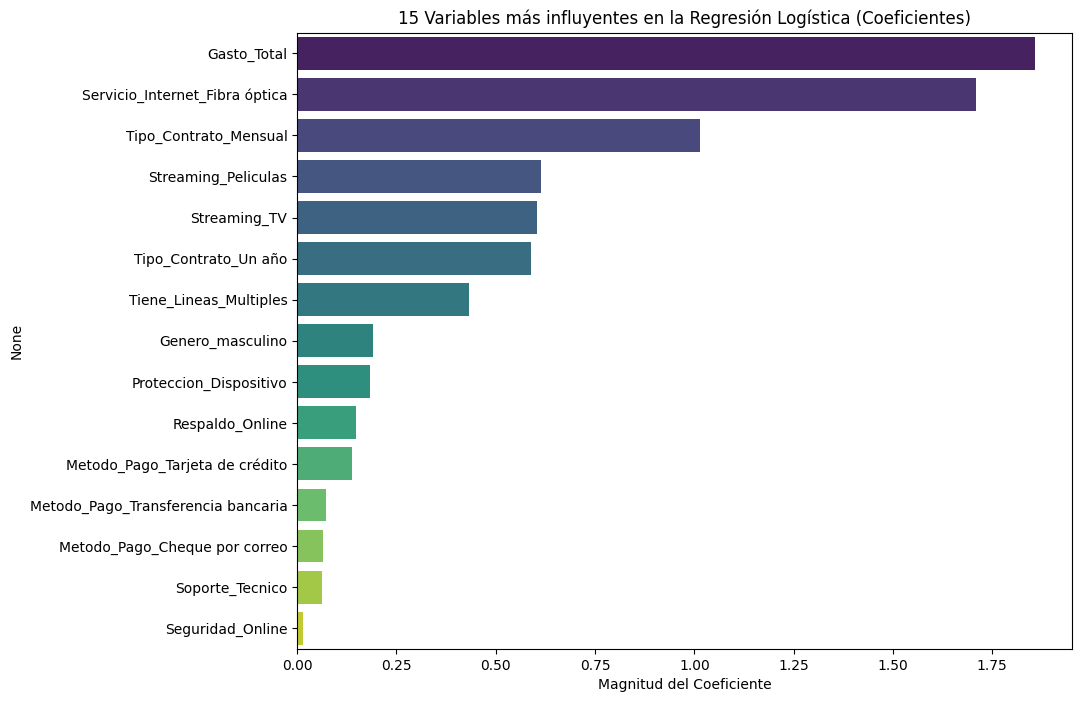


--- Interpretación de Coeficientes ---
Los coeficientes positivos sugieren que la variable aumenta la probabilidad de evasión.
Los coeficientes negativos sugieren que la variable reduce la probabilidad de evasión.

--- Importancia de Variables: Árbol de Decisión ---


/tmp/ipython-input-1317813335.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancia_arbol.head(15).values, y=importancia_arbol.head(15).index, palette='plasma')


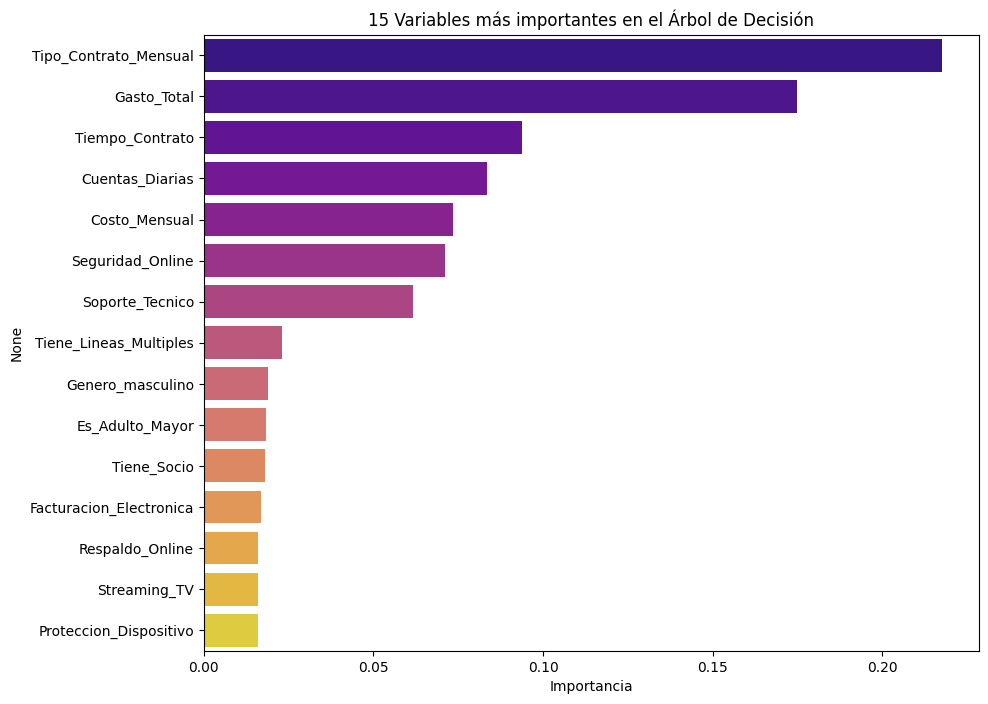


--- Interpretación de la Importancia ---
Los valores de importancia indican la relevancia de cada variable en la toma de decisiones del modelo.


In [15]:
# --- Regresión Logística: Análisis de Coeficientes ---
print("\n--- Importancia de Variables: Regresión Logística ---")
# Obtiene los coeficientes y sus nombres de columna
coeficientes = pd.Series(log_reg_model.coef_[0], index=X_train.columns).sort_values(ascending=False)

# Visualiza los coeficientes más influyentes
plt.figure(figsize=(10, 8))
sns.barplot(x=coeficientes.head(15).values, y=coeficientes.head(15).index, palette='viridis')
plt.title("15 Variables más influyentes en la Regresión Logística (Coeficientes)")
plt.xlabel("Magnitud del Coeficiente")
plt.show()

print("\n--- Interpretación de Coeficientes ---")
print("Los coeficientes positivos sugieren que la variable aumenta la probabilidad de evasión.")
print("Los coeficientes negativos sugieren que la variable reduce la probabilidad de evasión.")


# --- Árbol de Decisión: Análisis de Feature Importance ---
print("\n--- Importancia de Variables: Árbol de Decisión ---")
# Obtiene la importancia de las variables
importancia_arbol = pd.Series(tree_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Visualiza las variables más importantes
plt.figure(figsize=(10, 8))
sns.barplot(x=importancia_arbol.head(15).values, y=importancia_arbol.head(15).index, palette='plasma')
plt.title("15 Variables más importantes en el Árbol de Decisión")
plt.xlabel("Importancia")
plt.show()

print("\n--- Interpretación de la Importancia ---")
print("Los valores de importancia indican la relevancia de cada variable en la toma de decisiones del modelo.")

# Informe de Análisis Predictivo de la Evasión de Clientes (Churn)

## Resumen Ejecutivo
El objetivo principal de este análisis es identificar los factores más influyentes en la evasión de clientes (Churn) de la empresa de telecomunicaciones **Telecom X** y desarrollar modelos predictivos para anticipar este comportamiento. Se construyeron y evaluaron dos modelos: **Regresión Logística** y **Árbol de Decisión**, sobre un conjunto de datos preprocesado y balanceado con **SMOTE**. Los resultados muestran que el tipo de contrato, el gasto mensual y el tiempo de contrato son los factores más determinantes. Se proponen estrategias de retención enfocadas en estos hallazgos.

---

## 1. Preparación y Balanceo de Datos
Inicialmente, el conjunto de datos tenía **7267 registros**, con una distribución desbalanceada de la variable objetivo *Evasión*:

- **73.46%** de los clientes no evadieron (clase 0).
- **26.54%** de los clientes evadieron (clase 1).

Este desbalance fue corregido utilizando la técnica de oversampling **SMOTE**, lo que resultó en un nuevo conjunto de datos con **6498 registros** y una proporción perfectamente balanceada del 50% para cada clase. Esto es crucial para evitar que los modelos predictivos se sesguen hacia la clase mayoritaria.

---

## 2. Análisis de Correlación y Patrones

### Correlaciones Positivas (aumentan la evasión)
- **Tipo de Contrato (Mensual)**: Mayor correlación positiva; los clientes con contratos mensuales son más propensos a la evasión, probablemente por falta de compromiso.
- **Servicio de Internet (Fibra Óptica)**: Alta correlación con la evasión, posiblemente por problemas de calidad o insatisfacción.
- **Gasto Mensual**: Clientes con mayores costos son más propensos a cancelar, sugiriendo sensibilidad al precio.

### Correlaciones Negativas (reducen la evasión)
- **Tiempo de Contrato**: Mayor tiempo implica menor probabilidad de evasión.
- **Tipo de Contrato (Dos años)**: Contratos largos reducen significativamente la cancelación.
- **Soporte Técnico y Seguridad Online**: Disminuyen la evasión, mostrando la importancia de servicios de valor agregado.

---

## 3. Evaluación y Comparación de Modelos

Se evaluaron:
- **Regresión Logística** (con normalización)
- **Árbol de Decisión** (sin normalización)

| Métrica     | Regresión Logística | Árbol de Decisión |
|-------------|---------------------|-------------------|
| Precisión   | 0.7770              | 0.7963            |
| Recall      | 0.8262              | 0.8123            |
| F1-Score    | 0.8009              | 0.8043            |
| Exactitud   | 0.7985              | 0.8038            |

**Análisis Crítico:**  
Ambos modelos muestran buen rendimiento. El Árbol de Decisión tiene ligera ventaja, pero la Regresión Logística es más interpretable y menos propensa al sobreajuste con regularización.

---

## 4. Factores Clave según el Modelo

**Regresión Logística (Coeficientes)**:
- Aumentan la evasión: contrato mensual, ausencia de soporte técnico y seguridad online.
- Reducen la evasión: tiempo de contrato, contrato de dos años, presencia de soporte técnico.

**Árbol de Decisión (Importancia)**:
- Variables más relevantes: gasto total, tiempo de contrato, gasto mensual.

---

## 5. Conclusiones y Recomendaciones

Los factores más críticos para la evasión son:
- Compromiso a corto plazo
- Satisfacción con el servicio

**Recomendaciones Estratégicas**:
1. **Fidelización de clientes mensuales**: Descuentos, beneficios o upgrades para migrar a contratos de mayor duración.
2. **Mejora del servicio de Fibra Óptica**: Auditoría para resolver problemas de calidad o interrupciones.
3. **Reforzar servicios de valor agregado**: Promocionar soporte técnico y seguridad online a clientes de alto riesgo.
4. **Monitoreo del gasto**: Alertas y ofertas personalizadas para clientes con gasto elevado.
5. **Targeting proactivo**: Uso de modelos predictivos para contactar a clientes con alta probabilidad de evasión.